In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv')

In [3]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [4]:
df['X'] = df['3.159499363321345566e-02']
df['Y'] = df['9.869877579082642072e-01']
df['Class'] = df['0.000000000000000000e+00']

In [5]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00,X,Y,Class
0,2.115098,-0.046244,1.0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0,2.112857,0.662084,1.0


In [6]:
df.drop(columns=['3.159499363321345566e-02','9.869877579082642072e-01','0.000000000000000000e+00'],inplace=True)

In [7]:
df.head()

,X,Y,Class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [8]:
new_row = pd.DataFrame({'X':[0.031594],'Y':[0.986987],'Class':[0.0]})

In [9]:
df = pd.concat([df,new_row], ignore_index=True)

In [10]:
df.head()

,X,Y,Class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


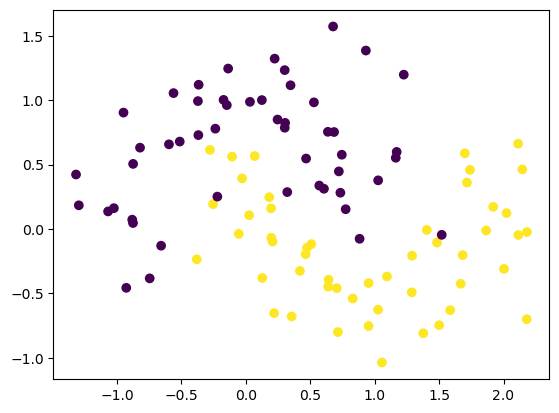

In [11]:
plt.scatter(df['X'],df['Y'],c=df['Class'])
plt.show()

In [12]:
x = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [33]:
model = Sequential()

model.add(Dense(10, activation='tanh',input_dim=2,kernel_initializer='glorot_normal'))
model.add(Dense(10, activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(10, activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(10, activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                30        
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.get_weights()

[array([[-0.3308915 ,  0.3199067 ,  0.3386161 , -0.57315993,  0.6034227 ,
          0.2204968 ,  0.22991057, -0.0787195 ,  0.74614584,  0.08993879],
        [ 0.29709795, -0.02509929, -0.35701346,  0.65824807, -0.15099534,
         -0.17025813,  0.30319607,  0.5294969 ,  0.04990931,  0.17371604]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.04539903,  0.45752552, -0.11300866,  0.12228352, -0.34791395,
          0.37357327,  0.32693172,  0.5564424 , -0.18484287, -0.27833426],
        [ 0.18781117, -0.24123056,  0.01627364,  0.5114906 , -0.4335537 ,
         -0.1609365 ,  0.22304584,  0.01456679, -0.15711659,  0.35205138],
        [-0.38538748, -0.10649669, -0.4587217 ,  0.42457604,  0.65331286,
          0.38399082,  0.14642282,  0.07774308, -0.16629839, -0.01508137],
        [-0.344936  ,  0.3281928 ,  0.17568372, -0.11699619, -0.5036884 ,
          0.23043662,  0.10938375, -0.348269  , -0.19121784, -0.36892924],
        [ 0.06572

In [35]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
history = model.fit(x,y,epochs=100,validation_split=0.2,verbose=True)

Epoch 1/100
3/3 [==============================] - 1s 86ms/step - loss: 0.8902 - accuracy: 0.2375 - val_loss: 0.9188 - val_accuracy: 0.1500
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 0.8655 - accuracy: 0.2375 - val_loss: 0.8890 - val_accuracy: 0.1500
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 0.8416 - accuracy: 0.2250 - val_loss: 0.8603 - val_accuracy: 0.1500
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.8219 - accuracy: 0.2125 - val_loss: 0.8319 - val_accuracy: 0.1500
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.7999 - accuracy: 0.2125 - val_loss: 0.8048 - val_accuracy: 0.1500
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 0.7793 - accuracy: 0.2000 - val_loss: 0.7784 - val_accuracy: 0.1500
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 0.7604 - accuracy: 0.2000 - val_loss: 0.7527 - val_accuracy: 0.1000
Epoch 8/100
3/3 [===

In [37]:
model.get_weights()

[array([[-0.26304942,  0.28579432,  0.22404471, -0.44993517,  0.44285992,
          0.22752811,  0.22364378, -0.05259603,  0.5900562 ,  0.13735877],
        [ 0.29784957, -0.16500463, -0.38583374,  0.7785515 , -0.22949295,
         -0.25294283,  0.48333478,  0.6141725 , -0.09199626,  0.08709857]],
       dtype=float32),
 array([-0.05540809, -0.05322908,  0.02359573,  0.0207994 , -0.00031149,
         0.03563898,  0.00028476, -0.04508552, -0.00470027, -0.0324796 ],
       dtype=float32),
 array([[-0.05709852,  0.4058513 , -0.17168684,  0.05363484, -0.26545754,
          0.24257262,  0.2184235 ,  0.64223266, -0.3546975 , -0.38247344],
        [ 0.25002316, -0.14391133,  0.07295713,  0.5445527 , -0.5438729 ,
         -0.07377174,  0.20656125, -0.00892287, -0.02715891,  0.4146528 ],
        [-0.26641116, -0.06706986, -0.39665508,  0.5073171 ,  0.5814463 ,
          0.5341103 ,  0.29188928, -0.02746201,  0.01469139,  0.10627862],
        [-0.4647992 ,  0.2864413 ,  0.11160243, -0.20499937, 

9600/9600 [==============================] - 8s 837us/step


<Axes: >

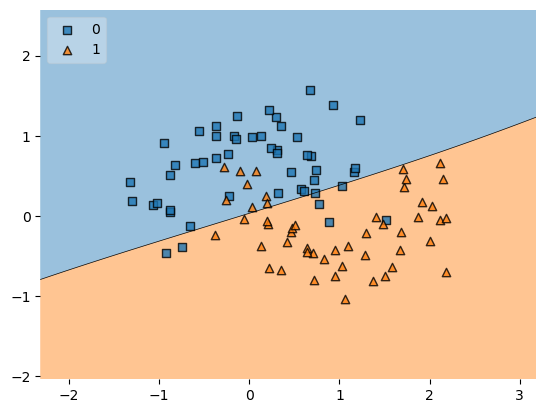

In [38]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'), clf=model, legend=2)